```
Import Library
```

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

```Start```

```Data Exploration (pre-processing)```

In [3]:
df_main = pd.read_csv('CarPrice_Assignment.csv')
df_main.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_main.shape

(205, 26)

In [5]:
df_main.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
print(df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
for i in df_main.columns:
    print(df_main[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
[ 3  1  2  0 -1 -2]
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s 

In [8]:
df_main.isnull().sum()
# no null value, no need for imputation

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

```
Categorical features

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem
```

<AxesSubplot:>

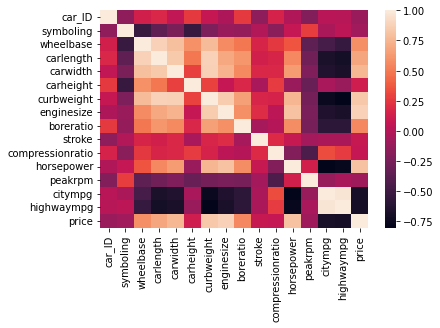

In [9]:
sns.heatmap(df_main.corr())

Based on the heatmap, there is high correlation between 'highwaympg' and 'citympg'. But, the number of multicollinearity is reatively small in this dataset, hence I will not remove it.

```
Modelling
```

```Column Transformer```

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

def OHE():
    ohe = OneHotEncoder(handle_unknown='ignore')

    col_trans = make_column_transformer((ohe, ['CarName','fueltype','aspiration',
    'doornumber','carbody','drivewheel','enginelocation',
    'enginetype','cylindernumber','fuelsystem']), remainder='passthrough')

    return col_trans

```Pipeline```

In [30]:
from sklearn.pipeline import make_pipeline

def pipeline_LR():

    coltrans = OHE()
    lr = LinearRegression()

    pipe = make_pipeline(coltrans, lr)
    return pipe

def pipeline_Rid():

    coltrans = OHE()
    rid = Ridge(max_iter= 5000)

    pipe = make_pipeline(coltrans, rid)
    return pipe

def pipeline_las():

    coltrans = OHE()
    las = Lasso(max_iter= 5000)

    pipe = make_pipeline(coltrans, las)
    return pipe

def pipeline_elasnet():

    coltrans = OHE()
    elasnet = ElasticNet()

    pipe = make_pipeline(coltrans, elasnet)
    return pipe

def pipeline_SGD():

    coltrans = OHE()
    sgd = SGDRegressor(alpha= 0.001, max_iter= 1000, penalty='l1')

    pipe = make_pipeline(coltrans, sgd)
    return pipe

```Feature Engineering```

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_main_i = df_main.copy()

X = df_main_i.drop('price', axis=1)
y = df_main_i['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

```Train the data```

In [31]:
# Create pipe object

pipe1 = pipeline_LR()
pipe2 = pipeline_Rid()
pipe3 = pipeline_las()
pipe4 = pipeline_elasnet()
pipe5 = pipeline_SGD()

pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)
pipe3.fit(X_train, y_train)
pipe4.fit(X_train, y_train)
pipe5.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CarName', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem'])])),
                ('sgdregressor', SGDRegressor(alpha=0.001, penalty='l1'))])

In [32]:
y_prediction_1 = pipe1.predict(X_test) 
y_prediction_2 = pipe2.predict(X_test) 
y_prediction_3 = pipe3.predict(X_test) 
y_prediction_4 = pipe4.predict(X_test) 
y_prediction_5 = pipe5.predict(X_test) 

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

mse_1 = mean_squared_error(y_test, y_prediction_1)
r2score_1 = r2_score(y_test, y_prediction_1)
mse_2 = mean_squared_error(y_test, y_prediction_2)
r2score_2 = r2_score(y_test, y_prediction_2)
mse_3 = mean_squared_error(y_test, y_prediction_3)
r2score_3 = r2_score(y_test, y_prediction_3)
mse_4 = mean_squared_error(y_test, y_prediction_4)
r2score_4 = r2_score(y_test, y_prediction_4)
mse_5 = mean_squared_error(y_test, y_prediction_5)
r2score_5 = r2_score(y_test, y_prediction_5)

fullinfo = {"TYPE":['Linear', 'Ridge', 'Lasso', 'Elastic Net', 'SGDReg'],
            "MSE": [mse_1, mse_2, mse_3, mse_4, mse_5], 
            "R2 SCORE":[r2score_1, r2score_2, r2score_3, r2score_4, r2score_5]}

df_acc = pd.DataFrame(fullinfo, columns=fullinfo.keys())

df_acc

,TYPE,MSE,R2 SCORE
0,Linear,3.396674e+07,5.697364e-01
1,Ridge,8.765518e+06,8.889654e-01
2,Lasso,1.600722e+07,7.972333e-01
3,Elastic Net,1.098050e+07,8.609077e-01
4,SGDReg,2.168331e+33,-2.746670e+25


```
Based on the table above, the best model here is Elastic Net, with 

MSE      : 1.098050e+07
R2 SCORE : 8.609077e-01
```

```
SGD showed a low r2_score. This is due to it depends on the hyperparameter used, which we are not used any in the code.

Because of that, SGD is exposed to the hyperparameter flexibility. This is due to it's functionality as an iterative model compared to Linear Regression. Hence it is really powerful when it comes to huge dataset, as it depends on RAM.

Now, we will try to find the best parameter using Cross Validation techniqe
which is the GridSearchCV.
```

```Hyparameter Tuning for SGDRegressor```

In [18]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'sgdregressor__penalty':('l1', 'l2', 'elasticnet'),
            'sgdregressor__alpha':[0.001,0.05],
            'sgdregressor__max_iter':[1000,2000,3000]}
#sgd = SGDRegressor()
optimal_params = GridSearchCV(pipe5, params, cv=5, scoring='accuracy')

optimal_params.fit(X_train, y_train)

print(optimal_params.best_params_)

```Output:'sgdregressor__alpha': 0.001, 'sgdregressor__max_iter': 1000, 'sgdregressor__penalty': 'l1'```

```
By using the result of the optimum parameter, the r2_score of the the SGD is still low as before. This probably because the parameter searching is not enough, and it less powerful when it come to smaller dataset. 

Hence, the  best model we can use on this dataset is Elastic Net.
```